In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [14]:
field_types = []
for i in range(len(data)):
    field_types.append(data.tag[i].split('\'')[3:-1:10])

In [25]:
output = {}
for i in field_types:
    for word in i:
        if word not in output:
            output[word] = 1
        else:
            output[word] += 1


In [ ]:
{'cs.CL': 'nlp','cs.AI': 'ai','cs.LG': 'ai','cs.NE': 'ai','stat.ML': 'ai','cs.CV': 'computer vision','68T45': 'ai','physics.soc-ph': 'physics','68Txx': 'ai','68T50': 'nlp','cs.RO': 'robotics','cs.MA': 'ai','math.OC': 'algorithms','cond-mat.dis-nn': 28,'cs.IR': 'algorithms','physics.chem-ph': 'physics','cs.MM': 'internet','cs.CG': 'algorithms','cs.CR': 'cryptography','eess.AS': 'sound','cs.SD': 'sound','stat.CO': 'algorithms','cs.GR': 'graphics','cs.DC': 'algorithms','math.NA': 'algorithms','cs.IT': 'information theory','math.IT': 'information theory','astro-ph.IM': 'astro-physics','astro-ph.GA': 'astro-physics','cs.SI': 'analysis','cs.CY': 'information theory',
 'nlin.AO': 9,
 'q-bio.NC': 107,
 'cs.DB': 'hardware',
 'cs.PF': 'algorithms',
 'cs.GT': 'algorithms',
 'eess.IV': 'algorithms',
 'cs.AR': 'hardware',
 'cs.SY': 63,
 'cs.LO': 'algorithms',
 'q-bio.BM': 13,
 'q-bio.QM': 67,
 'cs.NI': 12,
 'cond-mat.stat-mech': 14,
 'cs.DS': 91,
 'cs.DM': 14,
 'cs.CC': 17,
 'physics.optics': 'physics',
 '97R40': 'ai',
 'q-fin.CP': 6,
 '68T01': 'ai',
 'cs.FL': 'nlp',
 'q-fin.TR': 1,
 'cs.NA': 'analysis',
 'quant-ph': 25,
 'q-fin.RM': 1,
 'cs.CE': 30,
 'math.PR': 27,
 'cs.MS': 19,
 'physics.data-an': 'physics',
 'math.AT': 'algorithms',
 'physics.ao-ph': 'physics',
 'math.ST': 'algorithms',
 'stat.TH': 71,
 'cond-mat.mes-hall': 3,
 'math.DS': 7,
 'cs.PL': 14,
 'physics.flu-dyn': 'physics',
 'physics.geo-ph': 'physics',
 'math.MG': 'algorithms',
 'astro-ph.EP': 'astro-physics',
 'q-bio.CB': 1,
 'hep-th': 1,
 'physics.comp-ph': 'physics',
 'astro-ph.CO': 'astro-physics',
 'cs.ET': 'hardware',
 'cond-mat.mtrl-sci': 3,
 'math.FA': 8,
 'q-fin.ST': 4,
 'q-bio.GN': ,
 'eess.SP': 'sound',
 'hep-ex': }

In [34]:
data.author_count.mean()

3.3418882411488697

In [55]:
#if one would guess based on the most accuate 
baseline_model_accuacy = data.groupby(data.author_range).count().max()[0]/len(data)

0.2557941134650931

In [ ]:
baseline_mode

<AxesSubplot:xlabel='author_count'>

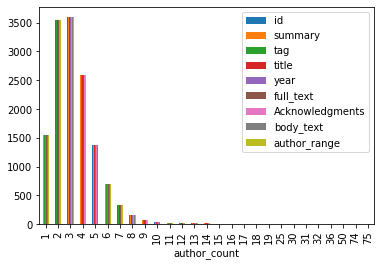

In [64]:
data.groupby(data.author_count).count().plot.bar()

<AxesSubplot:>

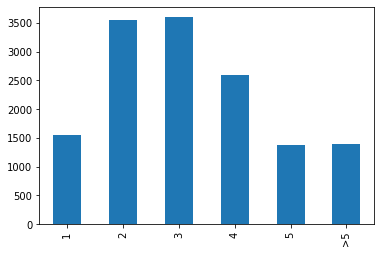

In [61]:
data.groupby(data.author_range)['id'].count().plot.bar()

In [41]:
data.groupby(data.author_range).mean()

,year,author_count
1,2014.428388,1.00000
2,2014.950958,2.00000
3,2015.304614,3.00000
4,2015.624277,4.00000
5,2015.747101,5.00000
>5,2016.100144,7.40634


In [43]:
data['author_range'] = data.author_range

In [45]:
excape_words = list('1234567890') + ['\\xd','\\n','\\xef','\\xac','\\xe','\\xc','\\xef','\\x','\\xbc']
body_text = []
for doc in list(data.body_text):
    for excape in excape_words:
        doc = doc.replace(str(excape),' ')
    body_text.append(doc)
data['body_text'] = body_text

In [66]:
data.to_csv('data/research_data.csv')

In [65]:
data['over_under_2015'] = ['<2015' if x < 2015 else ">=2015" for x in data.year]
